# FEATURE SELECTION WITH UNSUPERVISED LEARNING

**UNSUPERVISED LEARNING ALGORITHM:** KMEANS CLUSTERING

**FEATURE SELECTION:** VARIANCE THRESHOLD

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold

In [2]:
#Reading the collected data from csv file into a dataframe
df=pd.read_csv("hist.csv")

In [3]:
#Dropping the rows with null values
df=df.dropna() 

### Data Preprocessing

Converting the features from string to numeric by categorical classification 

In [4]:
sect=df.groupby(['Sector']).size()
df.Sector = pd.Categorical(df.Sector)
df.Sector = df.Sector.cat.codes

In [5]:
ind=df.groupby(['Industry']).size()
df.Industry = pd.Categorical(df.Industry)
df.Industry = df.Industry.cat.codes

Removing the base dataset to construct a dataframe with only features

In [6]:
features=df.drop(['Filing Name','Filing Date','Exchange','Ticker','Court District'],1)

In [7]:
#Display the features dataframe
features

,Sector,Industry,MarketCap,sharesOutstanding,bookValue,fiftyTwoWeekLow,fiftyTwoWeekHigh,averageDailyVolume3Month,fiftyDayAverage,twoHundredDayAverage,Open,Close,High,Low,Volume
0,5,6,1.133538e+10,1.082240e+08,8.295,104.75,48.140,2179806.0,90.957350,64.163475,103.56,103.54,103.92,103.32,1347197.0
1,16,1,1.722220e+08,6.464790e+06,10.367,28.26,11.080,61554.0,23.529705,18.592464,26.90,26.73,26.90,26.66,9363.0
2,36,6,7.273230e+07,1.744180e+07,2.505,13.18,3.400,249914.0,5.057353,7.787174,4.15,4.15,4.22,4.08,45185.0
3,5,6,1.422953e+07,5.646640e+07,0.349,2.18,0.240,3245575.0,0.321471,0.760435,0.32,0.31,0.32,0.31,1440291.0
5,5,6,5.283550e+08,5.283550e+07,2.465,10.21,3.180,934162.0,7.193530,4.752464,9.98,10.00,10.00,9.97,645422.0
6,5,6,9.985445e+09,1.153320e+08,10.117,86.76,19.620,4508570.0,76.678530,53.023770,85.76,86.08,86.20,85.75,2153155.0
7,15,8,1.334945e+08,3.467390e+07,-3.587,9.20,0.800,405024.0,5.398530,5.493188,3.84,4.01,4.05,3.74,490929.0
9,29,5,3.497305e+10,3.904550e+08,62.402,91.73,70.640,2231148.0,88.010880,85.103264,84.29,84.77,85.24,82.82,2616761.0
10,35,6,1.109340e+11,1.632580e+09,7.190,70.05,51.560,7305477.0,63.597057,62.152824,63.30,62.70,63.32,60.57,11158002.0
11,46,4,5.815972e+08,1.103600e+08,6.877,6.93,2.660,2814725.0,5.211471,4.659782,5.03,4.89,5.13,4.86,4232425.0


**KMeans Clustering**

Function to perform the clustering of data and plot the graph

In [8]:
def clusteringKmeans(data):
    scaleddata = scale(data)
    t = PCA(n_components=2).fit_transform(scaleddata)
    kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
    kmeans.fit(t)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = t[:, 0].min() - 1, t[:, 0].max() + 1
    y_min, y_max = t[:, 1].min() - 1, t[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(t[:, 0], t[:, 1], 'k.', markersize=2)
    # Ploting the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on features dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
    print("silhouette_score: ",metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))

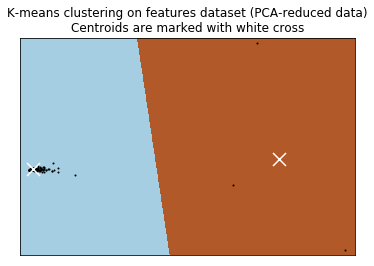

silhouette_score:  0.67821068029


In [9]:
clusteringKmeans(Normalizer().fit_transform(features))

- The database contains data only for features when the lawsuit is filed. 
- If all the features are equally likely to contribute to the lawsuite being filed, we can look for a single cluster. 
- Hence we may remove the less relevant features contrubuting to the filing of a lawsuit and see the changes on the cluster at each step

**Normalizing the Data**

Normalize the data before using VarianceThreshold to bring all the features to same scale. This is to avoid misleading variance estimates between higher value features and lower value features.

In [10]:
Ndata=Normalizer().fit_transform(features)

**Applying Variance Threshold Algorithm**
- This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
- Since the base dataset contains only one case(ie say +ve) of the lawsuit being filed. There is no data collected for -ve case of law suit not being filed or its features. Hence there is no target variable here and viewed as an unsupervised learning problem.
- Features with a variance lower than the set threshold will be removed. (Less significant compared to the other features)

In [11]:
def featureselect(num):
    selector = VarianceThreshold(threshold=num)
    selector.fit_transform(Ndata)
    print(selector.get_params())
    print(selector.get_support())
    print(selector.variances_)

In [12]:
featureselect(0.000000000001)

{'threshold': 1e-12}
[ True False  True  True  True  True False  True  True  True  True  True
  True  True  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 1


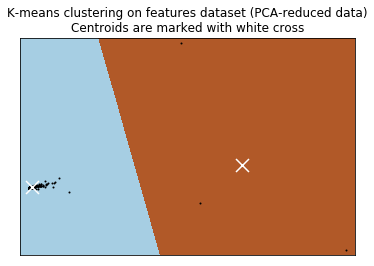

silhouette_score:  0.678210680283


In [13]:
print("Case 1")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh'],1)))

- we have set a threshold of 1e-12
- From the array of variance printed, we can find that the second feature has e-13 and the seventh has e-15
- Hence the two features are dropped ( Industry and fiftyTwoWeekHigh )
- we dont see much of an improvement in the cluster appearance

In [14]:
featureselect(0.00000000001)

{'threshold': 1e-11}
[False False  True  True  True  True False  True  True  True False False
 False False  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 2


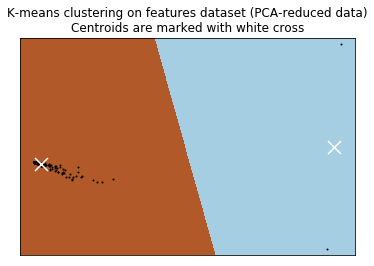

silhouette_score:  0.718079742627


In [15]:
print("Case 2")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh','Sector','Open','Close','High','Low'],1)))

- There is no considerble improvement from the previous

In [16]:
featureselect(0.0000000001)

{'threshold': 1e-10}
[False False  True  True  True  True False  True  True False False False
 False False  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 3


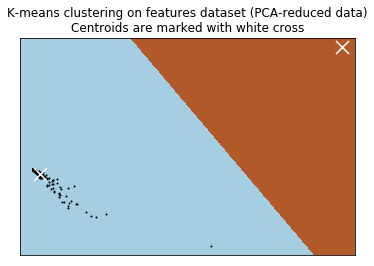

silhouette_score:  0.643486354293


In [17]:
print("Case 3")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh','Sector','Open','Close','High','Low','twoHundredDayAverage'],1)))

- In this we can see most of the data lie in one cluster

In [18]:
featureselect(0.000000001)

{'threshold': 1e-09}
[False False  True  True  True  True False  True False False False False
 False False  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 4


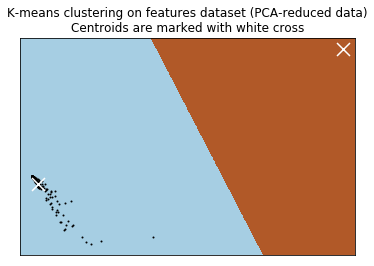

silhouette_score:  0.643486354308


In [20]:
print("Case 4")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh','Sector','Open','Close','High','Low','twoHundredDayAverage','fiftyDayAverage'],1)))

- This appears similar to the case 3

In [21]:
featureselect(0.00000001)

{'threshold': 1e-08}
[False False  True  True False  True False  True False False False False
 False False  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 5


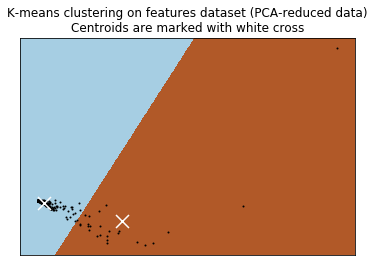

silhouette_score:  0.8042513659


In [22]:
print("Case 5")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh','Sector','Open','Close','High','Low','twoHundredDayAverage','fiftyDayAverage','bookValue'],1)))

- Here we can clearly see that some important features are being removed and the data being scattered into two clusters.

In [23]:
featureselect(0.000001)

{'threshold': 1e-06}
[False False  True  True False False False  True False False False False
 False False  True]
[  6.77888575e-12   1.89685485e-13   1.72812782e-02   5.01292237e-02
   3.51777998e-09   3.17958317e-07   3.70624409e-15   1.33874023e-03
   4.70945102e-10   3.82422280e-11   1.12616089e-12   1.14755187e-12
   1.23987362e-12   1.04938259e-12   8.72165205e-05]


Case 6


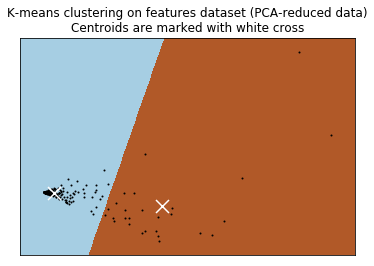

silhouette_score:  0.809802130649


In [24]:
print("Case 6")
clusteringKmeans(Normalizer().fit_transform(features.drop(['Industry','fiftyTwoWeekHigh','Sector','Open','Close','High','Low','twoHundredDayAverage','fiftyDayAverage','bookValue','fiftyTwoWeekLow'],1)))

- Similar to case 5
- Here we can clearly see that some most important features are being removed and the data being scattered into two clusters

**Conclusion**

Hence we can conclude that:
- Case 1 and 2 are not showing much of and improvement and there for the features eleminated very of less significance 
- Case 3 and 4 show the best optimal results for feature selection 
- Case 5 and 6 clearly show that some important features being eleminated.
- Thus, We have the best cluster for the threshold: 1e-09 (case 3)
- The features that contribute to having a class action lawsuit filed against a company are: MarketCap, SharesOutstanding, BookValue, fiftyTwoWeekLow, averageDailyVolume of 3 Months, fiftyDayAverage of the stock price and Volume of stocks on the day of lawsuit. 
- The features that are being eleminated are: Industry, fiftyTwoWeekHigh, Sector, Open, Close, High, Low, twoHundredDayAverage